In [57]:
# import libraries
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
import pickle
import sklearn

In [58]:
# read file
df_original=pd.read_csv("Salary_Data.csv")

df =df_original
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [59]:
# splitting data into train & test dataset
train,test=train_test_split(df,test_size=0.3,random_state=0)

In [60]:
train.shape

(21, 2)

In [61]:
test.shape

(9, 2)

In [62]:
# saving datasets into csv filesS
test.to_csv('test_data.csv',index=False,encoding='utf-8')
train.to_csv('train_data.csv',index=False,encoding='utf-8')


In [63]:
# loading training data csv file
train_df = pd.read_csv('train_data.csv')
train_df.head()

,YearsExperience,Salary
0,7.9,101302.0
1,2.9,56642.0
2,5.1,66029.0
3,3.2,64445.0
4,4.5,61111.0


In [64]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_df,test_size=0.3,random_state=0)

In [65]:
# separating features and labels of training dataset
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values


In [66]:
print("x_train",x_train.shape)
# print("x_test",x_cv.shape)
print("y_train",y_train.shape)
# print("y_test",y_cv.shape)

x_train (14, 1)
y_train (14,)


In [67]:
# saving cross validation data into csv file
cv_data.to_csv('cv_data.csv',index=False,encoding='utf-8')

In [68]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [70]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [71]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [72]:
df.duplicated().sum()

0

In [73]:
# fitting simple linear regression to the training dataset
regressor = LinearRegression(normalize=True)  
regressor.fit( x_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
# getting prediction values 
y_pred_train=regressor.predict(x_train)


In [75]:
# loading cross validation dataset file
cv_data = pd.read_csv('cv_data.csv')
train_df.head()

,YearsExperience,Salary
0,7.9,101302.0
1,2.9,56642.0
2,5.1,66029.0
3,3.2,64445.0
4,4.5,61111.0


In [76]:
# separate labels and features of cross validation dataset
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values


In [77]:
# getting predictions on cross validation dataset
y_pred = regressor.predict(x_cv)
df = pd.DataFrame({'Actual': y_cv, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,121872.0,125781.326202
1,57189.0,63215.528355
2,56957.0,65975.784142
3,56642.0,55854.846255
4,81363.0,83457.404129


In [78]:
# fileObject = open('file_Name.','wb') 

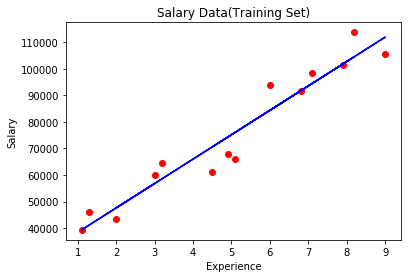

In [79]:
# visualizing the training set result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary Data(Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

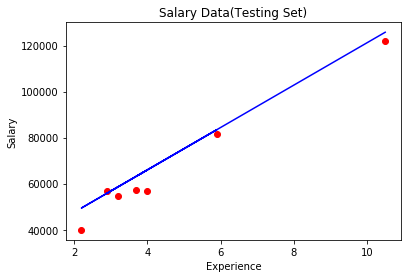

In [80]:
# visualizing the testing set result
plt.scatter(x_cv,y_cv,color='red')
plt.plot(x_cv,regressor.predict(x_cv),color='blue')
plt.title('Salary Data(Testing Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [81]:
# sklearn.metrics.accuracy_score(y_test,y_pred)

acc_train=sklearn.metrics.r2_score(y_train,y_pred_train)*100
print("Accuracy of train data =",acc_train)

acc_test=sklearn.metrics.r2_score(y_cv,y_pred)*100
print("Accuracy of test data =",acc_test)

Accuracy of train data = 93.1781732002388
Accuracy of test data = 94.42631048325192


In [82]:
fileObject = open("train_data.pkl",'wb')
pickle.dump(regressor,fileObject)   
# here we close the fileObject
fileObject.close()


In [83]:
# 
